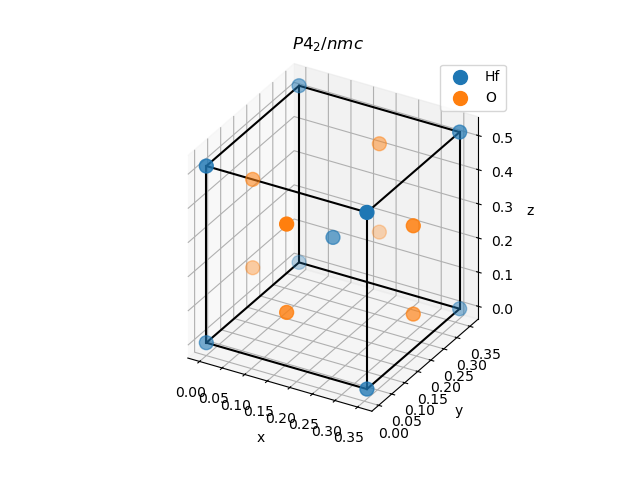

In [66]:
%matplotlib widget
from diffraction_simulation import diffraction_simulation as dsim
import numpy as np
from matplotlib import pyplot as plt
from pymatgen.core import Structure, Lattice
from pymatgen.core.operations import SymmOp

ewald = dsim.EwaldSphere(300e3)
pca21 = dsim.StructureHandler.from_matproj('HfO2_Pca21')
p42nmc= dsim.StructureHandler.from_matproj('HfO2_P42nmc')
P21c = dsim.StructureHandler.from_matproj('HfO2_P21c')

# fig,ax = pca21.plot_unit_cell(origin=pca21.struct.sites[0].coords/10, 
#                               low_frac=(0.1,-0.1,-0.3), 
#                               high_frac=(1.3,1.3,1.1)) # missing bottom face center Hf atom
# ax.legend()

cob_matrix = [[1, 1, 0],
              [1, -1, 0],
              [0, 0, 1]]

# Apply the change of basis
# p42nmc.struct.apply_operation(SymmOp.from_rotation_and_translation(cob_matrix, [0, 0, 0]))

fig,ax = p42nmc.plot_unit_cell()
ax.legend()

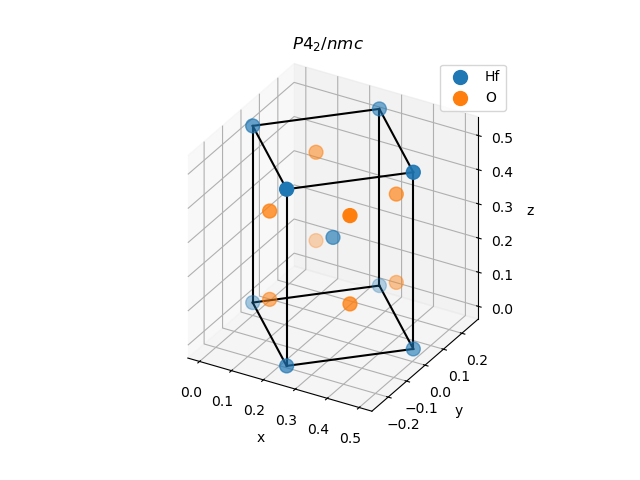

In [67]:
struct = p42nmc.struct
a1, a2, a3 = struct.lattice.matrix

# Build a rotation SymmOp: rotate 45° about the axis defined by a3
axis = a3 / np.linalg.norm(a3)  # unit vector along a3
theta = np.deg2rad(45)

# Rodrigues' rotation formula for rotation matrix
K = np.array([[0, -axis[2], axis[1]],
              [axis[2], 0, -axis[0]],
              [-axis[1], axis[0], 0]])
R = np.eye(3) + np.sin(theta) * K + (1 - np.cos(theta)) * (K @ K)

# Rotate lattice
new_latt = np.dot(R, struct.lattice.matrix)

# Rotate atomic Cartesian positions
new_coords = np.dot(struct.cart_coords, R.T)

# Build new structure
struct_rot = Structure(Lattice(new_latt), struct.species, new_coords, coords_are_cartesian=True)

fig,ax = dsim.StructureHandler(struct_rot).plot_unit_cell()
ax.legend()